# Explore Zillow Clustering Exercises

## 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [1]:
import pandas as pd
import numpy as np
import os

import env
import wrangle_zillow

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import explore_zillow

In [2]:
df = wrangle_zillow.get_zillow_data(cached=True)

In [3]:
df = wrangle_zillow.clean_zillow(df)
df.shape

(71579, 13)

In [4]:
df = wrangle_zillow.prepare_zillow(df)

In [5]:
df.head(1)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,logerror_class,county
parcelid,,,,,,,,,,,,,,
10711855,2.0,3.0,2107.0,34.222559,-118.617387,6.037113e+07,1972.0,249655.0,624139.0,374484.0,7659.36,-0.007357,q2,Los Angeles


In [6]:
#Create Dummies for County...Bivariate Separation...is_la_county
#df['is_la_county'] = pd.get_dummies(df['county'], drop_first=False)['Los Angeles']
#df = df.drop(columns=['county'])

In [7]:
df.tail(10)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,logerror_class,county
parcelid,,,,,,,,,,,,,,
167636727,3.0,4.0,2670.0,34.681736,-118.096714,6.037901e+07,2006.0,182200.0,242900.0,60700.0,3865.75,0.016445,q3,Los Angeles
167636859,3.0,3.0,1850.0,33.871568,-118.356202,6.037621e+07,2010.0,358180.0,649759.0,291579.0,7733.37,0.063190,q4,Los Angeles
167637040,4.0,4.0,2612.0,33.867353,-118.365160,6.037621e+07,2014.0,587728.0,1180227.0,592499.0,13636.59,0.015068,q3,Los Angeles
167637054,1.0,2.0,756.0,33.863071,-118.379246,6.037621e+07,1953.0,20083.0,84683.0,64600.0,1631.15,-0.217256,q1,Los Angeles
167637371,5.0,4.0,4000.0,34.089958,-118.451987,6.037262e+07,2013.0,1664376.0,2597367.0,932991.0,54391.29,2.069414,q4,Los Angeles
167638003,3.0,3.0,2108.0,34.126076,-118.226237,6.037186e+07,2014.0,303559.0,709659.0,406100.0,8621.13,-0.158701,q1,Los Angeles
167638721,4.0,4.0,2230.0,33.850800,-118.383424,6.037621e+07,2014.0,781742.0,1289367.0,507625.0,14861.90,-0.017580,q2,Los Angeles
167638926,2.0,2.0,1480.0,34.105027,-117.805889,6.037400e+07,2010.0,205500.0,400000.0,194500.0,4868.86,-0.009925,q2,Los Angeles
167639152,4.0,5.0,4232.0,33.981300,-117.803849,6.037403e+07,1977.0,800000.0,1600000.0,800000.0,17926.36,0.019842,q3,Los Angeles


In [8]:
#Create dummies for county
dummy_df = pd.get_dummies(df['county'], drop_first = True)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(columns={'county'})

In [9]:
train, validate, test = explore_zillow.train_validate_test_split(df, target='logerror_class', seed=123)

In [10]:
object_cols = explore_zillow.get_object_cols(train)
object_cols

[]

In [11]:
numeric_cols = explore_zillow.get_numeric_cols(train, explore_zillow.get_object_cols(train))
numeric_cols

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'rawcensustractandblock',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror',
 'logerror_class',
 'Orange',
 'Ventura']

In [12]:
def get_numeric_cols(df, object_cols):
    '''
    takes in a dataframe and list of object column names
    and returns a list of all other columns names, the non-objects. 
    '''
    numeric_cols = [col for col in df.columns.values if col not in object_cols]
    
    return numeric_cols

def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # create a mask of columns whether they are object type or not
    mask = np.array(df.dtypes ==  "category")

        
    # get a list of the column names that are objects (from the mask)
    object_cols = df.iloc[:, mask].columns.tolist()
    
    return object_cols

def scale_my_data(train, validate, test):
    #call numeric cols
    numeric_cols = get_numeric_cols(train, get_object_cols(train))

    scaler = StandardScaler()
    scaler.fit(train[numeric_cols])

    X_train_scaled = scaler.transform(train[numeric_cols])
    numeric_cols = get_numeric_cols(validate, get_object_cols(validate))
    X_validate_scaled = scaler.transform(validate[[numeric_cols]])
    numeric_cols = get_numeric_cols(test, get_object_cols(test))
    X_test_scaled = scaler.transform(test[numeric_cols])

    return X_train_scaled, X_validate_scaled, X_test_scaled

In [13]:
numeric_cols = get_numeric_cols(train, get_object_cols(train))
scaler = StandardScaler()
scaler.fit(train[['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'rawcensustractandblock',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror', 'Orange', 'Ventura']])

train_scaled = scaler.transform(train[['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'rawcensustractandblock',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror', 'Orange', 'Ventura']])

In [14]:
train_scaled

array([[-0.2855084 , -0.98596398,  0.0798247 , ..., -0.17269598,
        -0.63042375, -0.29319539],
       [ 0.76887881, -0.00809927, -0.18343409, ..., -0.17499602,
        -0.63042375, -0.29319539],
       [-0.2855084 , -0.00809927, -0.06892722, ...,  0.09191938,
        -0.63042375, -0.29319539],
       ...,
       [-0.2855084 , -0.00809927,  0.16115668, ...,  0.03849179,
        -0.63042375, -0.29319539],
       [-0.81270201, -0.00809927, -0.65537362, ...,  0.37097615,
         1.58623465, -0.29319539],
       [-0.2855084 , -0.00809927, -0.50448139, ..., -0.29639915,
        -0.63042375, -0.29319539]])

In [15]:

def scale_my_data(train, validate, test):
    scaler = StandardScaler()
    scaler.fit(train[['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'rawcensustractandblock',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror', 'Orange', 'Ventura']])
    X_train_scaled = scaler.transform(train[['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'rawcensustractandblock',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror', 'Orange', 'Ventura']])
    X_validate_scaled = scaler.transform(validate[['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'rawcensustractandblock',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror', 'Orange', 'Ventura']])
    X_test_scaled = scaler.transform(test[['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'rawcensustractandblock',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror', 'Orange', 'Ventura']])

    train[['bathroomcnt_scaled',
 'bedroomcnt_scaled',
 'calculatedfinishedsquarefeet_scaled',
 'latitude_scaled',
 'longitude_scaled',
 'rawcensustractandblock_scaled',
 'yearbuilt_scaled',
 'structuretaxvaluedollarcnt_scaled',
 'taxvaluedollarcnt_scaled',
 'landtaxvaluedollarcnt_scaled',
 'taxamount_scaled',
 'logerror_scaled', 'Orange_scaled', 'Ventura_scaled']] = X_train_scaled
    validate[['bathroomcnt_scaled',
 'bedroomcnt_scaled',
 'calculatedfinishedsquarefeet_scaled',
 'latitude_scaled',
 'longitude_scaled',
 'rawcensustractandblock_scaled',
 'yearbuilt_scaled',
 'structuretaxvaluedollarcnt_scaled',
 'taxvaluedollarcnt_scaled',
 'landtaxvaluedollarcnt_scaled',
 'taxamount_scaled',
 'logerror_scaled', 'Orange_scaled', 'Ventura_scaled']] = X_validate_scaled
    test[['bathroomcnt_scaled',
 'bedroomcnt_scaled',
 'calculatedfinishedsquarefeet_scaled',
 'latitude_scaled',
 'longitude_scaled',
 'rawcensustractandblock_scaled',
 'yearbuilt_scaled',
 'structuretaxvaluedollarcnt_scaled',
 'taxvaluedollarcnt_scaled',
 'landtaxvaluedollarcnt_scaled',
 'taxamount_scaled',
 'logerror_scaled', 'Orange_scaled', 'Ventura_scaled']] = X_test_scaled
    return train, validate, test

def prep_zillow(df):
    '''
    dummy var for gender into is_male
    add 'spending_class' that cut spending score into the 4 quartiles and label the new field by q1, q2, q3, q4. 
    split on target of 'spending_score'
    scale age and annual income. 
    '''
    df['logerror_class'] = pd.qcut(df.logerror, q=4, labels=['q1', 'q2', 'q3', 'q4'])
    train, validate, test = explore_zillow.train_validate_test_split(df, target='logerror_class', seed=123)
    train, validate, test = scale_my_data(train, validate, test)
    return df, train, validate, test

df, train, validate, test = prep_zillow(df)

In [16]:
train.shape, validate.shape, test.shape

((40084, 29), (17179, 29), (14316, 29))

In [17]:
train.head(1)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,...,longitude_scaled,rawcensustractandblock_scaled,yearbuilt_scaled,structuretaxvaluedollarcnt_scaled,taxvaluedollarcnt_scaled,landtaxvaluedollarcnt_scaled,taxamount_scaled,logerror_scaled,Orange_scaled,Ventura_scaled
parcelid,,,,,,,,,,,,,,,,,,,,,
10864793,2.0,2.0,1826.0,34.131689,-118.460553,6.037142e+07,1958.0,250000.0,1250000.0,1000000.0,...,-0.740186,-0.600474,-0.492386,0.270829,1.124842,1.347002,1.153094,-0.172696,-0.630424,-0.293195


# Explore

In [18]:
binary_vars = ['Orange', 'Ventura']
quant_vars = ['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'rawcensustractandblock',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror']
categorical_target = 'logerror_class'
continuous_target = 'logerror'

## Univariate Exploration

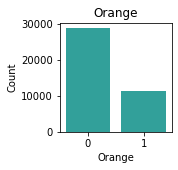

   Orange  Count  Percent
0       0  28684    71.56
1       1  11400    28.44
_________________________________________________________________


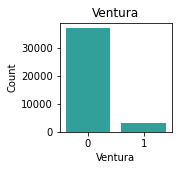

   Ventura  Count  Percent
0        0  36911    92.08
1        1   3173     7.92
_________________________________________________________________


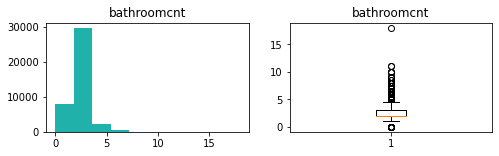

count    40084.000000
mean         2.270781
std          0.948430
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         18.000000
Name: bathroomcnt, dtype: float64


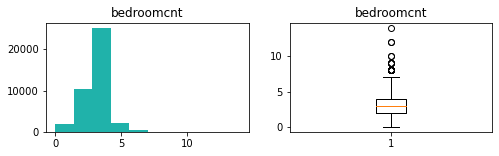

count    40084.000000
mean         3.008283
std          1.022649
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         14.000000
Name: bedroomcnt, dtype: float64


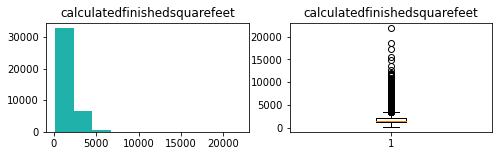

count    40084.000000
mean      1751.408467
std        934.453395
min        152.000000
25%       1165.000000
50%       1512.000000
75%       2062.000000
max      21929.000000
Name: calculatedfinishedsquarefeet, dtype: float64


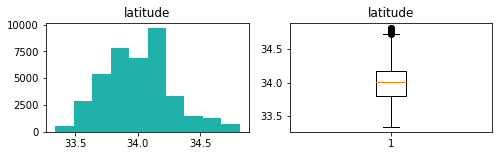

count    40084.000000
mean        34.004210
std          0.269185
min         33.339527
25%         33.803800
50%         34.015251
75%         34.175300
max         34.818767
Name: latitude, dtype: float64


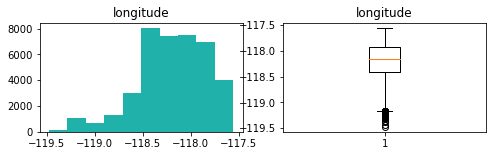

count    40084.000000
mean      -118.194037
std          0.360071
min       -119.475265
25%       -118.412607
50%       -118.165006
75%       -117.914420
max       -117.554636
Name: longitude, dtype: float64


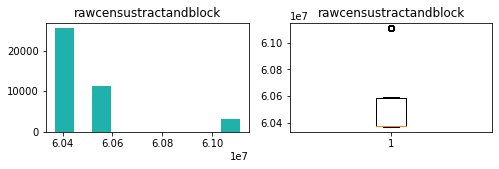

count    4.008400e+04
mean     6.049417e+07
std      2.044286e+05
min      6.037101e+07
25%      6.037400e+07
50%      6.037621e+07
75%      6.059052e+07
max      6.111009e+07
Name: rawcensustractandblock, dtype: float64


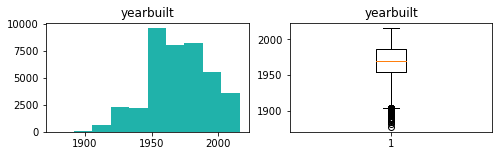

count    40084.000000
mean      1969.396243
std         23.145206
min       1878.000000
25%       1954.000000
50%       1970.000000
75%       1987.000000
max       2016.000000
Name: yearbuilt, dtype: float64


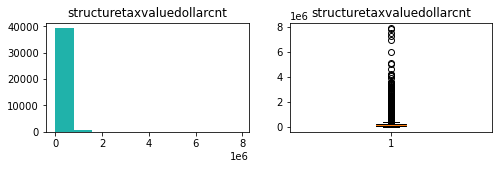

count    4.008400e+04
mean     1.881428e+05
std      2.284027e+05
min      1.290000e+02
25%      8.300000e+04
50%      1.347290e+05
75%      2.165132e+05
max      7.893568e+06
Name: structuretaxvaluedollarcnt, dtype: float64


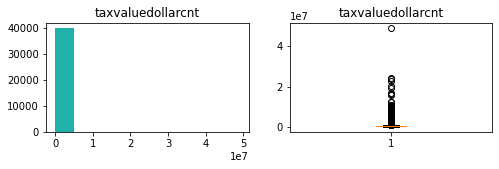

count    4.008400e+04
mean     4.882450e+05
std      6.772194e+05
min      1.050400e+04
25%      2.041220e+05
50%      3.552360e+05
75%      5.660000e+05
max      4.906124e+07
Name: taxvaluedollarcnt, dtype: float64


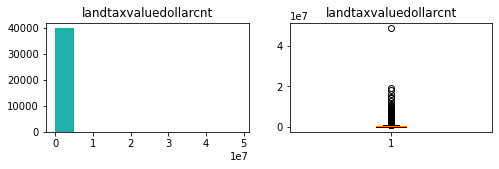

count    4.008400e+04
mean     3.001023e+05
std      5.196032e+05
min      1.610000e+02
25%      8.245200e+04
50%      2.029045e+05
75%      3.673805e+05
max      4.895220e+07
Name: landtaxvaluedollarcnt, dtype: float64


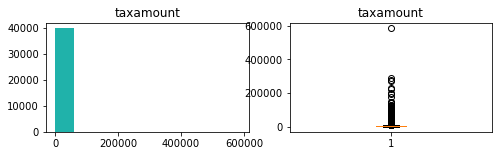

count     40084.000000
mean       5956.973406
std        7932.944350
min          49.180000
25%        2681.397500
50%        4392.680000
75%        6850.267500
max      586639.300000
Name: taxamount, dtype: float64


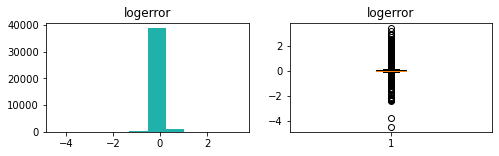

count    40084.000000
mean         0.016378
std          0.164114
min         -4.453964
25%         -0.023537
50%          0.006666
75%          0.038373
max          3.394544
Name: logerror, dtype: float64


In [19]:
explore_zillow.explore_univariate(train, binary_vars, quant_vars)

## Univariate Exploration Takeaways:

- 71% in Orange County, 8% in Ventura, 21% in Los Angeles 
- Outliers in Bathroom? 18 bathrooms is the max. May want to deal with this. 
- Outliers in Bedroom? Max = 14
- Outliers in finishedsquarefeet? 
- Latitude has less variance than  longitude. Longitude is left skewed. (Properties clustered on lat axis?)
- Rawcensus block ==> Look into what this is referring to
- region id county is just county. Drop column
- region zip here has erros anyways from knowledge of the data set. Drop unless I can validate with geopy
- Yearbuilt could be interesting...How does age play into logerror?
- Possible upperbound outliers on structuretaxdollar valuecount
- Taxvaluedollarcnt = also some outliers?
- Assessment year is 2016 for all. drop column
- Landtaxvaluedollarcnt...Land may have more variance by location...more so than structure. Might be some interplay with logerror
- taxamount helps with county tax rate...should calculate
- What is logerror saying?


## Bivariate Exploration

Orange 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=161482815.0, pvalue=0.05374059099149533)
         chi2       p-value  degrees of freedom
0  214.058467  3.863809e-46                   3

observed:
 logerror_class     q1     q2     q3     q4    All
Orange                                           
0                7581   6766   6940   7397  28684
1                2440   3255   3081   2624  11400
All             10021  10021  10021  10021  40084

expected:
         0       1       2       3
0  7171.0  7171.0  7171.0  7171.0
1  2850.0  2850.0  2850.0  2850.0


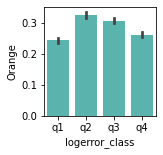


_____________________

Ventura 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=57550340.0, pvalue=0.10672292454621754)
        chi2       p-value  degrees of freedom
0  31.698978  6.056495e-07                   3

observed:
 logerror_class     q1     q2     q3     q4    All
Ventura                                          
0                9333   9123   9204   9251  36911
1                 688    898    817    770   3173
All             10021  10021  10021  10021  40084

expected:
          0        1        2        3
0  9227.75  9227.75  9227.75  9227.75
1   793.25   793.25   793.25   793.25


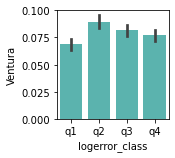


_____________________

bathroomcnt 
____________________



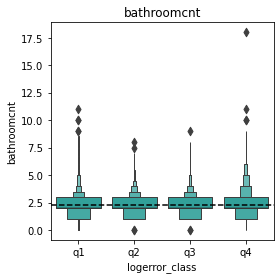

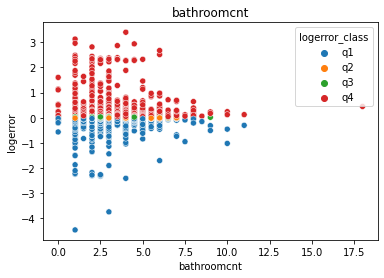

logerror_class            q1            q2            q3            q4
count           10021.000000  10021.000000  10021.000000  10021.000000
mean                2.162708      2.253568      2.295579      2.371270
std                 0.933169      0.834103      0.868873      1.119904
min                 0.000000      0.000000      0.000000      0.000000
25%                 2.000000      2.000000      2.000000      2.000000
50%                 2.000000      2.000000      2.000000      2.000000
75%                 3.000000      3.000000      3.000000      3.000000
max                11.000000      8.000000      9.000000     18.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06472395021204519, pvalue=1.7735387121406139e-38)

____________________

bedroomcnt 
____________________



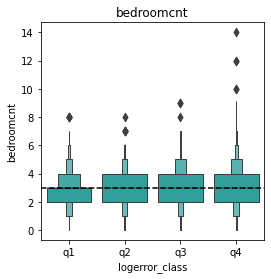

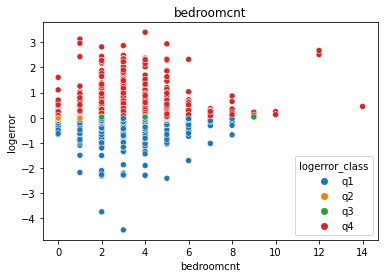

logerror_class            q1            q2            q3            q4
count           10021.000000  10021.000000  10021.000000  10021.000000
mean                2.912384      2.987526      3.035026      3.098194
std                 0.981926      0.973062      1.007987      1.112682
min                 0.000000      0.000000      0.000000      0.000000
25%                 2.000000      2.000000      2.000000      2.000000
50%                 3.000000      3.000000      3.000000      3.000000
75%                 3.000000      4.000000      4.000000      4.000000
max                 8.000000      8.000000      9.000000     14.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.058940987410521006, pvalue=3.44635370674308e-32)

____________________

calculatedfinishedsquarefeet 
____________________



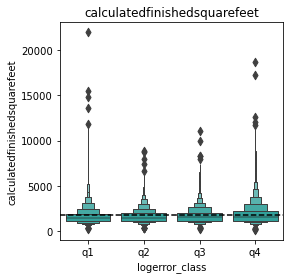

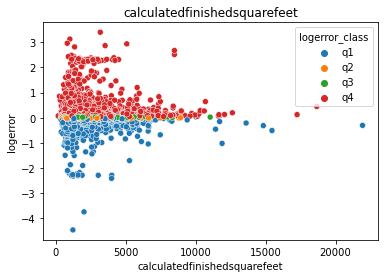

logerror_class            q1            q2            q3            q4
count           10021.000000  10021.000000  10021.000000  10021.000000
mean             1667.663207   1680.063766   1744.520507   1913.386389
std               908.971975    770.389109    828.725316   1161.106149
min               300.000000    368.000000    240.000000    152.000000
25%              1124.000000   1165.000000   1190.000000   1194.000000
50%              1440.000000   1493.000000   1541.000000   1591.000000
75%              1925.000000   1999.000000   2075.000000   2270.000000
max             21929.000000   8909.000000  11027.000000  18654.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.07809982538793765, pvalue=2.8482703066864105e-55)

____________________

latitude 
____________________



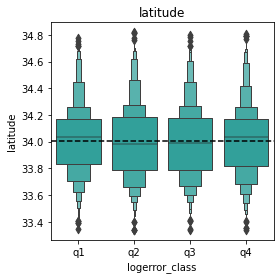

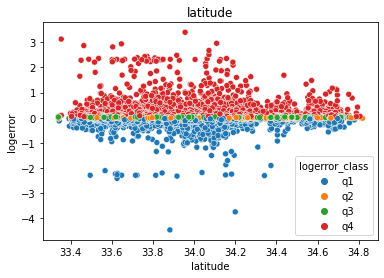

logerror_class            q1            q2            q3            q4
count           10021.000000  10021.000000  10021.000000  10021.000000
mean               34.016488     33.997068     33.996435     34.006849
std                 0.259834      0.281877      0.273454      0.260478
min                33.344289     33.339527     33.340658     33.341224
25%                33.830305     33.785500     33.790444     33.817662
50%                34.034050     33.981400     33.992980     34.035574
75%                34.173100     34.185006     34.175900     34.168849
max                34.778840     34.818767     34.795811     34.806955 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.007703659027175001, pvalue=0.12299499852167985)

____________________

longitude 
____________________



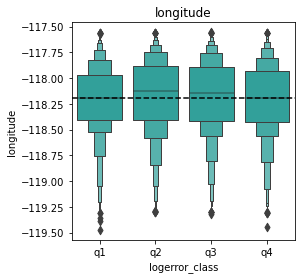

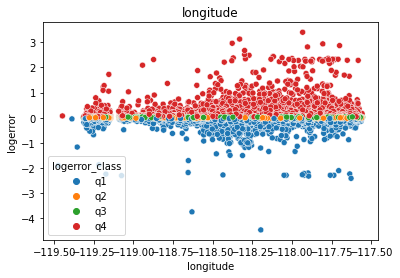

logerror_class            q1            q2            q3            q4
count           10021.000000  10021.000000  10021.000000  10021.000000
mean             -118.212947   -118.173553   -118.179098   -118.210550
std                 0.338098      0.374084      0.368019      0.357327
min              -119.475265   -119.302564   -119.316449   -119.448392
25%              -118.407211   -118.410017   -118.412159   -118.421000
50%              -118.197049   -118.128000   -118.142335   -118.191915
75%              -117.966242   -117.882626   -117.887646   -117.931551
max              -117.560032   -117.560562   -117.554636   -117.557472 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.004401865562439985, pvalue=0.3781696404483029)

____________________

rawcensustractandblock 
____________________



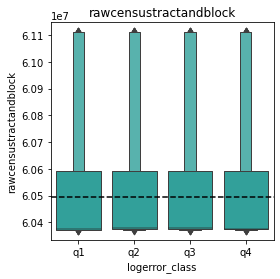

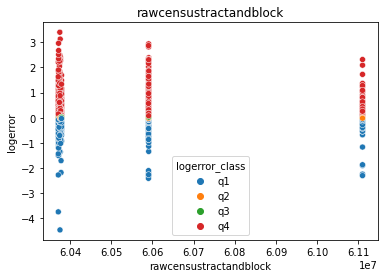

logerror_class            q1            q2            q3            q4
count           1.002100e+04  1.002100e+04  1.002100e+04  1.002100e+04
mean            6.047749e+07  6.051072e+07  6.050097e+07  6.048749e+07
std             1.947220e+05  2.123718e+05  2.060989e+05  2.025805e+05
min             6.037101e+07  6.037101e+07  6.037101e+07  6.037101e+07
25%             6.037275e+07  6.037406e+07  6.037403e+07  6.037297e+07
50%             6.037571e+07  6.037901e+07  6.037700e+07  6.037578e+07
75%             6.059042e+07  6.059053e+07  6.059052e+07  6.059042e+07
max             6.111009e+07  6.111009e+07  6.111009e+07  6.111009e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.010226249174737937, pvalue=0.0406202095172564)

____________________

yearbuilt 
____________________



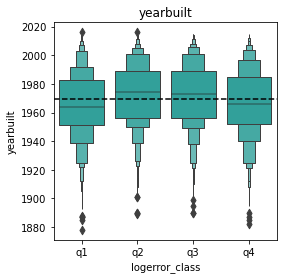

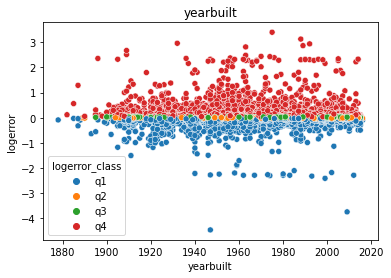

logerror_class            q1            q2           q3            q4
count           10021.000000  10021.000000  10021.00000  10021.000000
mean             1965.097196   1972.985530   1972.48548   1967.016765
std                23.447332     21.947576     22.24561     23.875662
min              1878.000000   1889.000000   1890.00000   1882.000000
25%              1951.000000   1956.000000   1956.00000   1952.000000
50%              1964.000000   1974.000000   1973.00000   1966.000000
75%              1983.000000   1989.000000   1989.00000   1985.000000
max              2016.000000   2016.000000   2015.00000   2015.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0293381214185509, pvalue=4.231922492408176e-09)

____________________

structuretaxvaluedollarcnt 
____________________



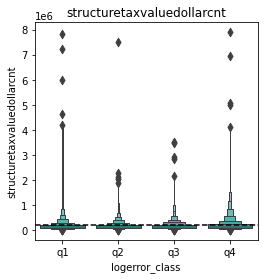

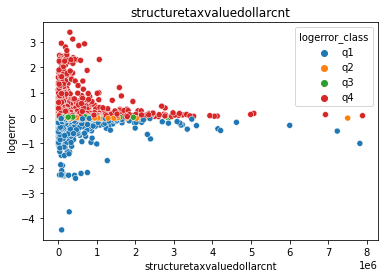

logerror_class            q1            q2            q3            q4
count           1.002100e+04  1.002100e+04  1.002100e+04  1.002100e+04
mean            1.789182e+05  1.766203e+05  1.839987e+05  2.130337e+05
std             2.433949e+05  1.683353e+05  1.759865e+05  2.988027e+05
min             1.290000e+02  1.810000e+02  1.015000e+03  1.480000e+02
25%             7.697600e+04  8.829100e+04  8.900000e+04  7.840200e+04
50%             1.260940e+05  1.377220e+05  1.401040e+05  1.335830e+05
75%             2.030000e+05  2.141710e+05  2.184210e+05  2.354930e+05
max             7.824604e+06  7.507773e+06  3.502612e+06  7.893568e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.02891549063320106, pvalue=7.0303807244833654e-09)

____________________

taxvaluedollarcnt 
____________________



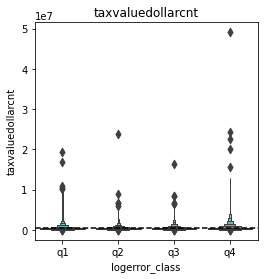

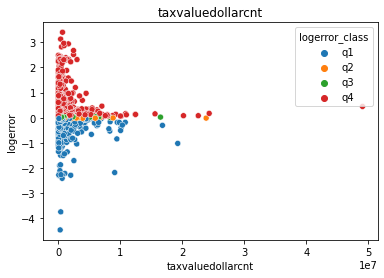

logerror_class            q1            q2            q3            q4
count           1.002100e+04  1.002100e+04  1.002100e+04  1.002100e+04
mean            4.776162e+05  4.459203e+05  4.665987e+05  5.628449e+05
std             6.451564e+05  4.633728e+05  4.900773e+05  9.775407e+05
min             1.319800e+04  1.352400e+04  1.050400e+04  1.335200e+04
25%             1.875440e+05  2.218600e+05  2.207130e+05  1.857280e+05
50%             3.365470e+05  3.639350e+05  3.680000e+05  3.496140e+05
75%             5.456290e+05  5.471610e+05  5.620000e+05  6.244120e+05
max             1.928070e+07  2.385837e+07  1.649781e+07  4.906124e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.018151916452823637, pvalue=0.000278650705975305)

____________________

landtaxvaluedollarcnt 
____________________



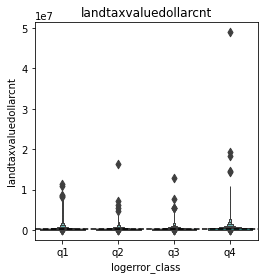

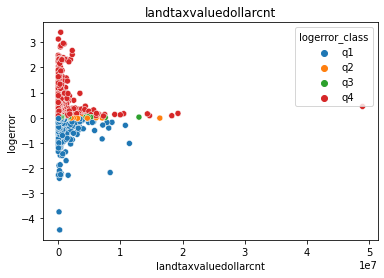

logerror_class            q1            q2            q3            q4
count           1.002100e+04  1.002100e+04  1.002100e+04  1.002100e+04
mean            2.986980e+05  2.693000e+05  2.825999e+05  3.498112e+05
std             4.566589e+05  3.356449e+05  3.629508e+05  7.895406e+05
min             1.217000e+03  4.912000e+03  3.906000e+03  1.610000e+02
25%             7.538200e+04  9.327200e+04  9.002600e+04  7.280500e+04
50%             1.937630e+05  2.091480e+05  2.083480e+05  1.964200e+05
75%             3.640000e+05  3.505000e+05  3.611180e+05  4.013660e+05
max             1.145610e+07  1.635060e+07  1.299520e+07  4.895220e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.009038715291556006, pvalue=0.07035462431458793)

____________________

taxamount 
____________________



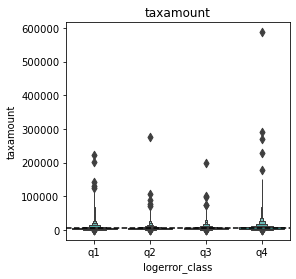

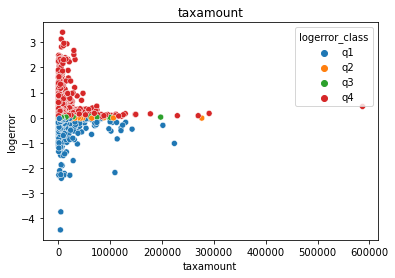

logerror_class             q1             q2             q3             q4
count            10021.000000   10021.000000   10021.000000   10021.000000
mean              5832.221758    5476.441530    5713.763708    6805.466628
std               7607.240660    5423.451305    5685.601451   11450.310028
min                202.120000      51.260000      89.180000      49.180000
25%               2533.450000    2879.700000    2868.220000    2457.220000
50%               4178.840000    4474.460000    4552.300000    4331.600000
75%               6593.240000    6617.240000    6840.000000    7528.920000
max             223982.290000  276797.830000  197525.120000  586639.300000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.017312759016465885, pvalue=0.0005276010428209248)

____________________

logerror 
____________________



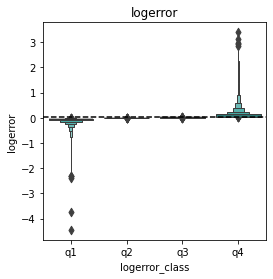

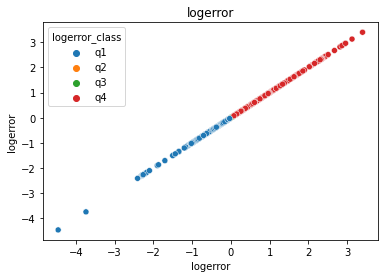

logerror_class            q1            q2            q3            q4
count           10021.000000  10021.000000  10021.000000  10021.000000
mean               -0.094114     -0.006972      0.020822      0.145778
std                 0.154689      0.008594      0.009005      0.232675
min                -4.453964     -0.023537      0.006666      0.038373
25%                -0.096015     -0.014171      0.012890      0.052854
50%                -0.054395     -0.006184      0.020037      0.077260
75%                -0.035711      0.000574      0.028381      0.142667
max                -0.023537      0.006666      0.038373      3.394544 


Spearman's Correlation Test:
 SpearmanrResult(correlation=1.0, pvalue=0.0)

____________________



In [20]:
explore_zillow.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

## Bivariate Exploration Takeaways:

- Property with high bathroom count (18) actually has a low log error ==> prediction was more accurate than expected for an assumed outlier...Is there another feature at play there that is helping with reducing the logerror? 

- As the number of bathrooms increase, the logerrors become less negative for q1.
- Bathroom count has the highest pearson's correlation coefficient
- Bedroom count mimics bathroom count
- Finished square feet: Greater variance in log error correlates with less square footage?
- Latitude alone does not say much
- Longitude says more than latitude...something might be going on with longitude as also assumed above in univariate exploration. 
- Definitely some random zip codes in there that don't match / need validation
- There is less variance in log error for homes built prior to 1940 than homes built after 1940?
- More variance in structure value than land value 

## Multivariate Exploration

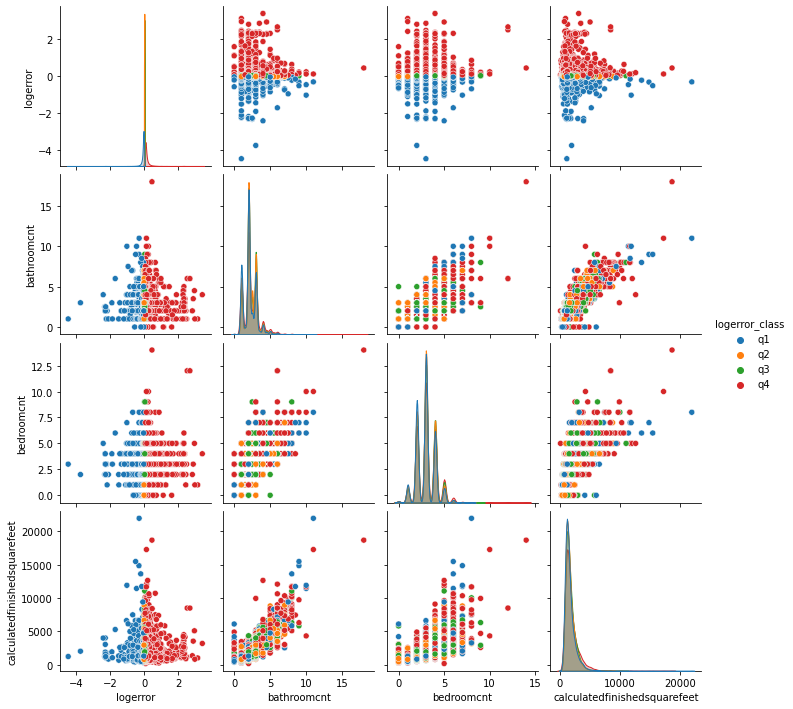

In [30]:
sns.pairplot(train[['logerror','logerror_class', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']], hue='logerror_class')

<AxesSubplot:>

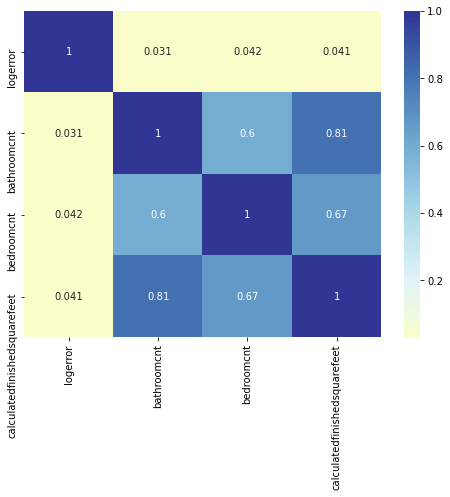

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(train[['logerror','logerror_class', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']].corr(), cmap='RdYlBu', annot=True, center=0)

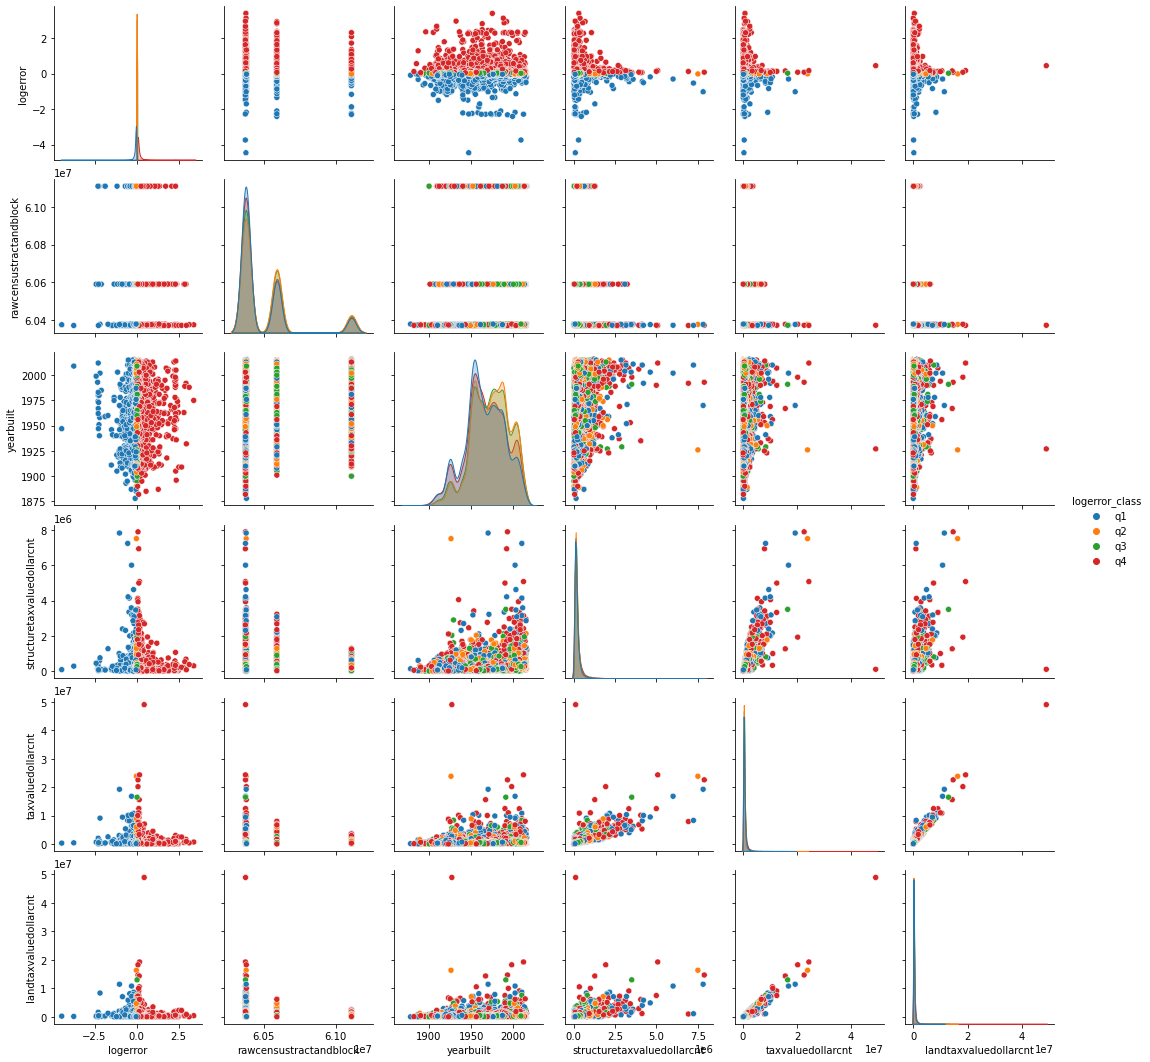

In [35]:
sns.pairplot(train[['logerror','logerror_class','rawcensustractandblock','yearbuilt','structuretaxvaluedollarcnt',
'taxvaluedollarcnt','landtaxvaluedollarcnt']], hue='logerror_class')

### ??? Properties built prior to 1940 seem to have less variance in log error.
    - Are values of older properties easier to predict/have less logerror?

<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

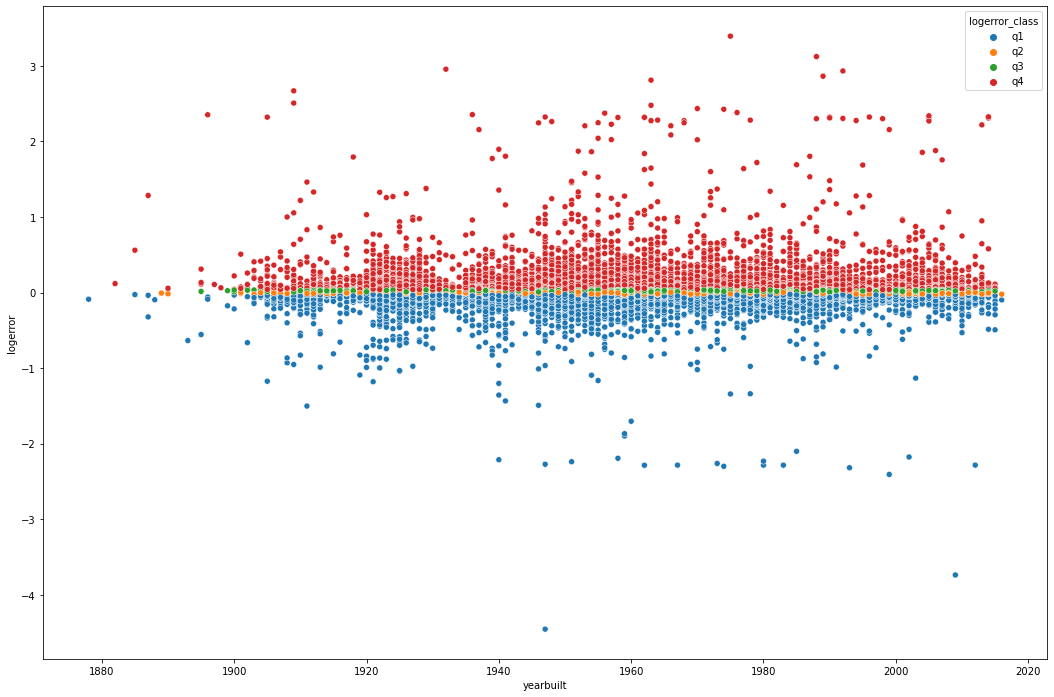

In [38]:
plt.figure(figsize=(18,12))
sns.scatterplot(x=train.yearbuilt, y=train.logerror, hue=train.logerror_class)